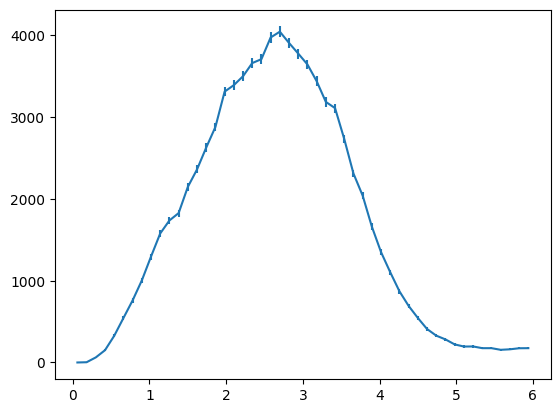

In [1]:
import pyNUISANCE as pn
import pyProSelecta as pps

hf = pn.HistFrame(pn.Binning.lin_space(0,5,20), "MCPrediction")

evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

def enu_GeV(ev):
    bpart = pps.sel.Beam(ev,14)
    if not bpart:
        return pn.HistFrame.missing_datum
    return bpart.momentum().e() * 1E-3

import matplotlib.pyplot as plt
import numpy as np

hf = pn.HistFrame(pn.Binning.lin_space(0,6,50, "E_{nu} [GeV]"), "mc")
for i, (ev, cvw) in enumerate(evs):
    hf.fill(enu_GeV(ev),cvw)
    if i >= 1E5:
        break

plt.errorbar(pn.Binning.get_bin_centers1D(hf.binning.bins),
             hf.sumweights[:,0],yerr=np.sqrt(hf.variances[:,0]))
plt.show()

In [6]:
bv = hf.finalise()
shf = pn.convert.HistFrame.to_yaml_str(bv)
print(shf)

independent_variables:
  - header:
      name: E_{nu} [GeV]
      units: ""
    values:
      - low: 0
        high: 0.12
      - low: 0.12
        high: 0.24
      - low: 0.24
        high: 0.36
      - low: 0.36
        high: 0.48
      - low: 0.48
        high: 0.6
      - low: 0.6
        high: 0.72
      - low: 0.72
        high: 0.84
      - low: 0.84
        high: 0.96
      - low: 0.96
        high: 1.08
      - low: 1.08
        high: 1.2
      - low: 1.2
        high: 1.32
      - low: 1.32
        high: 1.44
      - low: 1.44
        high: 1.56
      - low: 1.56
        high: 1.68
      - low: 1.68
        high: 1.8
      - low: 1.8
        high: 1.92
      - low: 1.92
        high: 2.04
      - low: 2.04
        high: 2.16
      - low: 2.16
        high: 2.28
      - low: 2.28
        high: 2.4
      - low: 2.4
        high: 2.52
      - low: 2.52
        high: 2.64
      - low: 2.64
        high: 2.76
      - low: 2.76
        high: 2.88
      - low: 2.88
        high: 3
 

In [7]:
a = pn.convert.HistFrame.from_yaml_str(shf)

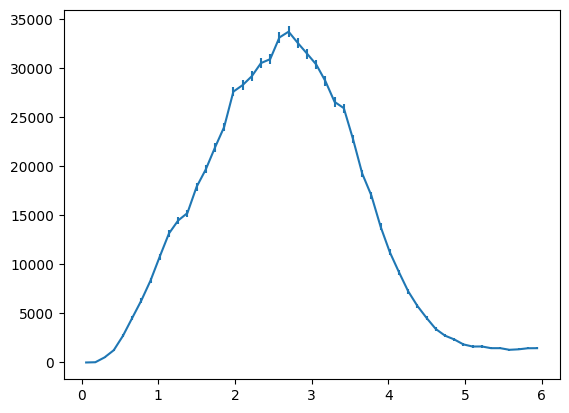

In [9]:
plt.errorbar(pn.Binning.get_bin_centers1D(a.binning.bins),
             a.values[:,0],yerr=a.errors[:,0])
plt.show()

In [16]:
hf = a.make_HistFrame()
hf.fill(2,1000)
print(hf)

 ---------------------
 | bin |      |  err |
 ---------------------
 |   0 |    0 |    0 |
 |   1 |    0 |    0 |
 |   2 |    0 |    0 |
 |   3 |    0 |    0 |
 |   4 |    0 |    0 |
 |   5 |    0 |    0 |
 |   6 |    0 |    0 |
 |   7 |    0 |    0 |
 |   8 |    0 |    0 |
 |   9 |    0 |    0 |
 |  10 |    0 |    0 |
 |  11 |    0 |    0 |
 |  12 |    0 |    0 |
 |  13 |    0 |    0 |
 |  14 |    0 |    0 |
 |  15 |    0 |    0 |
 |  16 | 1000 | 1000 |
 |  17 |    0 |    0 |
 |  18 |    0 |    0 |
 |  19 |    0 |    0 |
 |  20 |    0 |    0 |
 |  ... |  ... |
 ---------------------


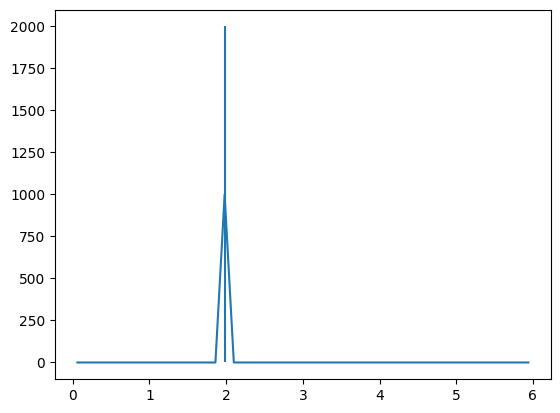

In [17]:
plt.errorbar(pn.Binning.get_bin_centers1D(hf.binning.bins),
             hf.sumweights[:,0],yerr=np.sqrt(hf.variances[:,0]))
plt.show()